In [1]:
library(ggplot2)
library(mgcv)
library(visreg)
library(reshape2)
library(ggpubr)
library(ggpattern)
library(plyr)
library(ggsignif)
library(lmerTest)
library(dplyr)
library(broom.mixed)
library(sjPlot)
library(sjmisc)
library(sjlabelled)
library(lme4)

Loading required package: nlme

This is mgcv 1.8-36. For overview type 'help("mgcv-package")'.

Loading required namespace: memoise


Attaching package: ‘plyr’


The following object is masked from ‘package:ggpubr’:

    mutate


Loading required package: lme4

Loading required package: Matrix


Attaching package: ‘lme4’


The following object is masked from ‘package:nlme’:

    lmList



Attaching package: ‘lmerTest’


The following object is masked from ‘package:lme4’:

    lmer


The following object is masked from ‘package:stats’:

    step



Attaching package: ‘dplyr’


The following objects are masked from ‘package:plyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize


The following object is masked from ‘package:nlme’:

    collapse


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Registered S3 methods overwritten by 'pa

In [2]:
datax = read.csv('gmdata2.csv')
datax = datax[!duplicated(datax),]
#head(datax)
#dd= subset(pnc, CBFTYPE=='BASIL')
#head(dd)


Model summary:


Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: QEI ~ FD * CBFTYPE + (1 | sub)
   Data: pnc

REML criterion at convergence: -20921.8

Scaled residuals: 
     Min       1Q   Median       3Q      Max 
-12.7571  -0.3853   0.0345   0.4857   6.6670 

Random effects:
 Groups   Name        Variance  Std.Dev.
 sub      (Intercept) 0.0008265 0.02875 
 Residual             0.0012450 0.03528 
Number of obs: 5952, groups:  sub, 1488

Fixed effects:
                  Estimate Std. Error         df t value Pr(>|t|)    
(Intercept)      8.166e-01  2.068e-03  4.023e+03 394.821  < 2e-16 ***
FD              -4.596e-02  1.055e-02  4.023e+03  -4.355 1.36e-05 ***
CBFTYPEPVC      -1.625e-03  2.267e-03  4.458e+03  -0.717 0.473620    
CBFTYPESCBF     -9.831e-02  2.267e-03  4.458e+03 -43.357  < 2e-16 ***
CBFTYPESCRUB    -1.879e-02  2.267e-03  4.458e+03  -8.287  < 2e-16 ***
FD:CBFTYPEPVC    3.826e-02  1.157e-02  4.458e+03   3.306 0.000953 ***
FD:CBFTYPESCBF  -3.038



Get the overall interaction signficance using anova: 


,Sum Sq,Mean Sq,NumDF,DenDF,F value,Pr(>F)
,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
FD,0.3546917,0.3546917,1,1486,284.8978,1.298098e-58
CBFTYPE,3.1462624,1.0487541,3,4458,842.3872,0.000000e+00
FD:CBFTYPE,1.3081328,0.4360443,3,4458,350.2424,3.141697e-204


Scale for 'y' is already present. Adding another scale for 'y', which will
replace the existing scale.



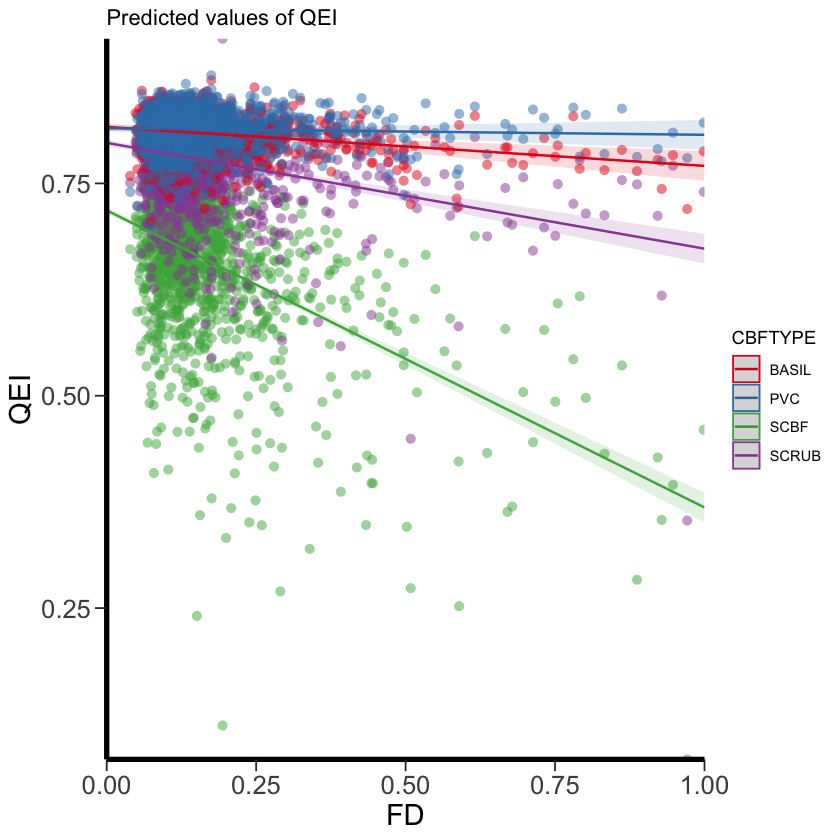

In [3]:

pnc <- subset(datax, Datasets=='PNC')
#pnc = datax
#pnc = na.omit(pnc)
#pnc.cen <- pnc$QEI - mean(pnc$QEI)

pnc.model <- lmerTest::lmer(QEI ~FD*CBFTYPE  + (1 | sub ), data=pnc)

cat("\nModel summary:\n")
summary(pnc.model)

cat("\n\nGet the overall interaction signficance using anova: \n")
anova(pnc.model)

sjPlot::plot_model(pnc.model, colors = "Set1",type = "int",show.data = TRUE) + theme(axis.title.x = element_text(size = rel(1.6))) +
            theme(axis.title.y = element_text(size = rel(1.6))) + 
            theme(axis.text = element_text(size = rel(1.4))) + theme(axis.line = element_line(colour = 'black', size = 1.5), axis.ticks.length = unit(.25, "cm")) +
           theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank(), panel.background = element_blank())  + scale_x_continuous(expand = c(0, 0)) +
           scale_y_continuous(expand = c(0, 0))


#Plot

In [4]:
basil = subset(pnc, CBFTYPE == 'FSL')
#head(basil)
scbf = subset(pnc, CBFTYPE == 'SCBF')
unique(pnc$CBFTYPE)

[1] "SCBF"  "SCRUB" "BASIL" "PVC"

In [5]:
summary(pnc.model)$coefficients

,Estimate,Std. Error,df,t value,Pr(>|t|)
(Intercept),0.81655826,0.002068175,4022.763,394.8206266,0.000000e+00
FD,-0.04596042,0.010553634,4022.763,-4.3549381,1.364184e-05
CBFTYPEPVC,-0.00162501,0.002267469,4458.000,-0.7166628,4.736197e-01
CBFTYPESCBF,-0.09830977,0.002267469,4458.000,-43.3566128,0.000000e+00
CBFTYPESCRUB,-0.01879131,0.002267469,4458.000,-8.2873529,1.516033e-16
FD:CBFTYPEPVC,0.03825673,0.011570603,4458.000,3.3063729,9.526032e-04
FD:CBFTYPESCBF,-0.30381995,0.011570603,4458.000,-26.2579171,2.005767e-141
FD:CBFTYPESCRUB,-0.07866350,0.011570603,4458.000,-6.7985649,1.196270e-11


In [6]:
#write.table('file.txt',spnc.model$coefficients)

In [7]:
p.adjust(pnc.model$coefficients)

ERROR: Error in pnc.model$coefficients: $ operator not defined for this S4 class


In [ ]:
dd = tidy(pnc.model)
dd$p.bonf  = p.adjust(dd$p.value)
#dd

tablex = cbind(dd$term,dd$estimate,dd$std.error,dd$statistic,dd$df,dd$p.value,dd$p.bonf)
tablex

In [ ]:

dd = tidy(pnc.model)
dd$p.bonf  = p.adjust(dd$p.value)
#dd

tablex = cbind(dd$term,dd$estimate,dd$std.error,dd$statistic,dd$df,dd$p.value,dd$p.bonf)
#tablex
colnames(tablex)=c('Term','Estimate','Std.Error','tStatistic','df','pvalue','pvaluebonf')
tablex = tablex [complete.cases(tablex ), ]
tablex =data.frame(tablex)
tablex$Estimate=round(as.numeric(tablex$Estimate),4)
tablex$Std.Error=round(as.numeric(tablex$Std.Error),4)
tablex$tStatistic=round(as.numeric(tablex$tStatistic),4)
tablex$df=round(as.numeric(tablex$df),0)
tablex$pvalue = signif(as.numeric(tablex$pvalue),4)
tablex$pvaluebonf = signif(as.numeric(tablex$pvaluebonf),4)
tablex

In [ ]:
write.table(tablex,file = "pncmodeltest.txt",quote=F, row.names=F,sep = "   ")

In [ ]:
summary(pnc.model)

In [9]:
datax = read.csv('gmdata2.csv')
datax <- subset(datax, datax$QEI> 0.1)
namex='all'
datay = datax[datax$Datasets != 'FTD',]
scbf = datay[datay$CBFTYPE=='SCBF',]
scrub = datay[datay$CBFTYPE=='SCRUB',]
basil = datay[datay$CBFTYPE=='BASIL',]
pvc = datay[datay$CBFTYPE=='PVC',]

cols = c("LINE1"="#e34a33","LINE2"="#3182bd","LINE3"="#d95f02",'LINE4'="#c51b8a")

CBF_Age_plot <- ggplot() + xlim(0, 1)+ ylim(0,1) +
  #theme(legend.position = "none")  +
  
  theme(axis.title.x = element_text(size = rel(1.6))) +
  theme(axis.title.y = element_text(size = rel(1.6))) + 
  theme(axis.text = element_text(size = rel(1.4))) + theme(axis.line = element_line(colour = 'black', size = 1.5), axis.ticks.length = unit(.25, "cm")) +
  theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank(), panel.background = element_blank()) +
  #geom_point(data = predicts, aes(x, y), colour = "darksalmon", alpha=0.7 ) +  
  geom_point(data=scbf,aes(x=FD, y=QEI),size=1,color="red")+ 
  geom_point(data=scrub,aes(x=FD, y=QEI),size=1,color="blue")+ 
  geom_point(data=basil,aes(x=FD, y=QEI),size=1,color='darkgreen')+ 
  geom_point(data=pvc,aes(x=FD, y=QEI),size=1,color="#c51b8a")+ 

  geom_smooth(method='lm',data=scbf, aes(x=FD, y=QEI), color='#e34a33')+
  geom_smooth(method='lm',data=scrub,aes(x=FD, y=QEI), color="#3182bd")+
  geom_smooth(method='lm',data=basil,aes(x=FD, y=QEI), color="#31a354")+
  #geom_smooth(method='lm',data=pvc,aes(x=FD, y=QEI), color="#c51b8a") +
  labs(x = "FD", y = "QEI",color=cols,title =namex)+ 
  scale_colour_manual(values=cols) + 
  scale_linetype_manual(values=cols) +
  scale_x_continuous(expand = c(0, 0)) + scale_y_continuous(expand = c(0, 0))

  #theme(legend.position="bottom")

dev.off()

## Export image
png(filename="all_QEI_FD.png",res = 600, width = 4, height = 4, units = 'in',)
CBF_Age_plot
dev.off()

Scale for 'x' is already present. Adding another scale for 'x', which will
replace the existing scale.

Scale for 'y' is already present. Adding another scale for 'y', which will
replace the existing scale.



null device 
          1

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'



null device 
          1